In [10]:
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

# Confusion Matrix Plot

In [11]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = LogisticRegression()
model.fit(X_train, y_train)
predict = model.predict(X_test)

In [12]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_true=y_test, y_pred=predict)

print(conf_mat)

[[133  12]
 [ 17 138]]


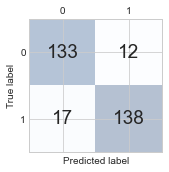

In [13]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(conf_mat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax.text(x=j, y=i, s=conf_mat[i, j], va='center', ha='center', fontsize=19 )
        
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

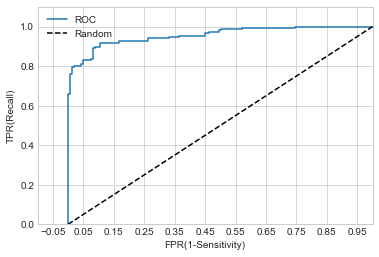

In [18]:
import numpy as np
from sklearn.metrics import roc_curve

pred_proba_class1 = model.predict_proba(X_test)[:, 1] # 클래스가 1인것에 대한 확률
fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

plt.plot(fprs, tprs, label='ROC')

plt.plot([0, 1], [0, 1], '--k', label='Random')
start,end = plt.xlim()
plt.xticks(np.round(np.arange(start, end, 0.1), 2))
plt.xlim(-0.1, 1)
plt.ylim(0, 1.1)
plt.xlabel('FPR(1-Sensitivity)')
plt.ylabel('TPR(Recall)')
plt.legend();